![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()
bikes['season'].describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

In [5]:
value_counts=bikes['season'].value_counts()
print(value_counts)

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64


La variable season es una variable categorica donde cada una de las temporadas del año toma un valor de 1-4. Podemos ver que la variables que mas se repite es la 4 que es el otoño y la que menos se repite es el 1 que es el verano pero hay una distribudcion muy similar. A esta variable es importante darle un tratamiento especial en algunos modelos ya que es categorica.

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()
bikes['hour'].describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

La variable de horas tiene un minimo de 0:00 y un maximo de 23 lo cual quiere decir que las personas alquilan biciecletas en todas las horas del dia, pero el promedio es alrededor de las 11-12 del día que parece ser la hora más popular. Podemos ver, además, que los percentiles est+án distribuidos de una manera muy uniforme, donde el 25% de las bicicletas es alquilado antes de las 6, el 50% a las 12 y el 75% a las 6pm.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

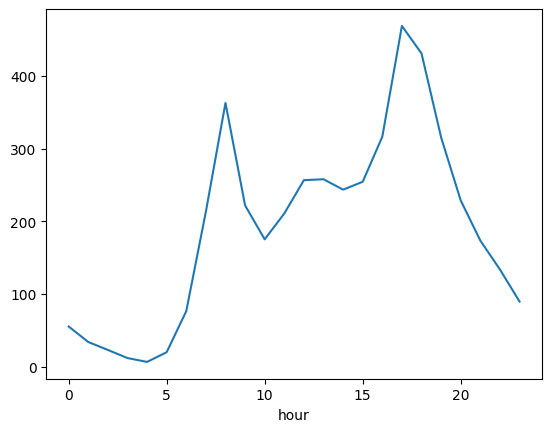

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

1    2686
Name: season, dtype: int64


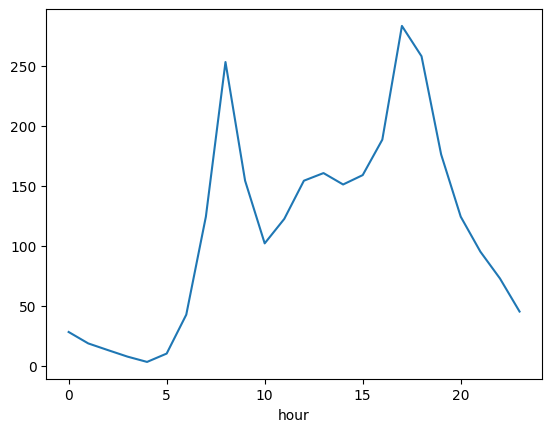

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes1 = bikes[bikes['season'] == 1]
bikes1.groupby('hour').total.mean().plot()
value_counts=bikes1['season'].value_counts()
print(value_counts)

3    2733
Name: season, dtype: int64


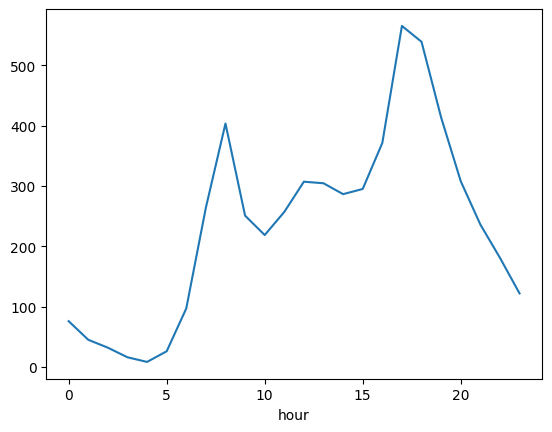

In [9]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes2 = bikes[bikes['season'] == 3]
bikes2.groupby('hour').total.mean().plot()
value_counts2=bikes2['season'].value_counts()
print(value_counts2)

Al mirar como se distribuye el numero de alquileres en las horas del día, podemos ver que hay unos picos al rededor de las 7 y otro al rededor de las 16 en donde se alquilan mas bicicletas. También se puede ver un pequeño valle cerca a las 10 am. El crecimiento en la mañana es muy claro, como lo es el descrecimiento en la tarde-noche luego de las 5 PM. Aunque hay algunos cambios cuando se ven las estaciones especificas, no parece ser tan grane lo cual lleva a creer que el número de biciceltas alquilado a ciertas horas no se ve altamente dterminado por la estacion del año.

En el invierno vemos que es un poco mas marcado el valle cerca a delas 10 am y que se alquilan menos bicicletas. El punto máximo al rededor de las 4 PM es menos de 300 bicicletas mientras que en el verano el punto máximo sucede a la misma hora pero son más de 500 bicicletas en promedio. Lo mismo pasa en los valles donde el minimo en el verano es al rededor de 20 bicicletas en promedio a las 4 am pero en el invierno es más cercano a 5 bicicletas. En general, el comportamiento es similar con magnitudes diferentes en promedio.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3
bikes['season_cat']=bikes['season'].astype('category')

feature_cols = bikes[['hour', 'season_cat']]
y=bikes['total']
X = feature_cols

reg = LinearRegression().fit(X, y)

In [11]:
reg.coef_

array([10.52129824, 26.95130851])

In [12]:
reg.intercept_

2.5848513346808204

Haciendo una regresion lineal para tratar de estimar el total de bicicletas alquiladas por las variables season y hour parece ser que en cambios de la hora y de la temporada, el numero de bicicletas aumenta. Empezando por el intercepto nos parece decir que cuando las variables explicativas son cero, entonces se alquilan en promedio dos biciceltas. Entrando a los coeficientes, podemos ver que cuando la hora aumenta en una unidad, el alquiler promedio de biciceltas aumenta en 10 mientras que con cambios en la temporada del año podemos ver aumentos en el alquier de bibicletas en 26.

Algunas limitaciones pueden ser la normalidad y lineal. En estos tipos de modelos asumimos que los datos tienen un comportamiento normal y que la relación entre la variable y y x es lineal y que las observaciones son independientes. Además sabemos que este tipo de modelos es mas sensible a datos atipicos y no son los que mejor manejan los datos atipicos.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [76]:
feature_cols = bikes[['hour', 'season']]
y=bikes['total']
X = feature_cols
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

In [77]:
#Defino el error cuadratico
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [78]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    best_error = float('inf')
    
    best_split = [0, 0,best_error]   # j, split, error
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X_train.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            error = mse(y_train, split)
                        
            if error < best_split[2]:
                best_split = [j, split, error]
    
    return best_split

In [79]:
j, split, error = best_split(X, y, 5)
j, split, error

(0, 19.0, 62907.93102975456)

In [80]:
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [81]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 8606, 2280)

In [82]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 192.50766906809204, 188.05043859649123)

In [83]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1)
        return tree
    
    # Calcular la mejor división
    best_error = float('inf')
    j, split, error = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0])
    # Revisar el criterio de parada 
    if best_error == mse(y, np.full(len(y), np.mean(y))):
        return np.mean(y)
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [84]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 21.0],
 'n_samples': 10886,
 'sl': {'y_pred': 1,
  'y_prob': 200.07279411764705,
  'level': 1,
  'split': -1,
  'n_samples': 9518},
 'sr': {'y_pred': 1,
  'y_prob': 131.95985401459853,
  'level': 1,
  'split': -1,
  'n_samples': 1368}}

In [86]:
tree = tree_grow(X, y, level=0,  max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 21.0],
 'n_samples': 10886,
 'sl': {'y_pred': 1,
  'y_prob': 200.07279411764705,
  'level': 1,
  'split': [0, 21.0],
  'n_samples': 9518,
  'sl': {'y_pred': 1,
   'y_prob': 200.07279411764705,
   'level': 2,
   'split': [0, 21.0],
   'n_samples': 9518,
   'sl': {'y_pred': 1,
    'y_prob': 200.07279411764705,
    'level': 3,
    'split': -1,
    'n_samples': 9518},
   'sr': {'y_pred': 0,
    'y_prob': 0.5,
    'level': 3,
    'split': -1,
    'n_samples': 0}},
  'sr': {'y_pred': 0,
   'y_prob': 0.5,
   'level': 2,
   'split': [0, 21.0],
   'n_samples': 0,
   'sl': {'y_pred': 0, 'y_prob': 0.5, 'level': 3, 'split': -1, 'n_samples': 0},
   'sr': {'y_pred': 0,
    'y_prob': 0.5,
    'level': 3,
    'split': -1,
    'n_samples': 0}}},
 'sr': {'y_pred': 1,
  'y_prob': 131.95985401459853,
  'level': 1,
  'split': [0, 21.0],
  'n_samples': 1368,
  'sl': {'y_pred': 0,
   'y_prob': 0.5,
   'level': 2,
   'split': [0, 21.0],
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [15]:
# Celda 5
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour
bikes['season']=bikes['season'].astype('category')

feature_cols = bikes[['hour', 'season']]
y=bikes['total']
X = feature_cols

max_depth_range = range(3, 21)
accuracy_scores = []


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(criterion='squared_error',max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10).mean())

Text(0, 0.5, 'Accuracy')

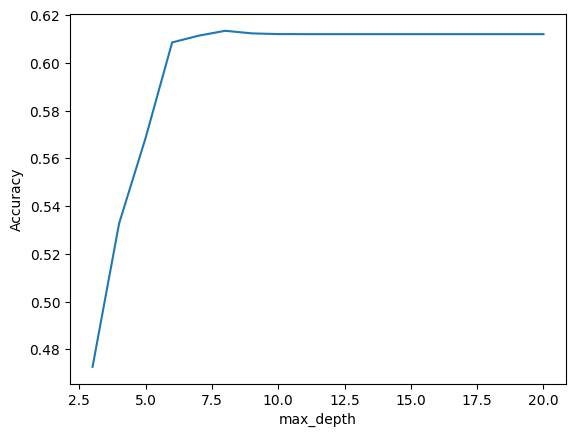

In [17]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [18]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6134052369062071, 8)

In [19]:
min_samples_leaf_range = range(500,1000)
accuracy_scores = []

for hoja in min_samples_leaf_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(criterion='squared_error',min_samples_leaf=hoja, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10).mean())

Text(0, 0.5, 'min_samples_leaf')

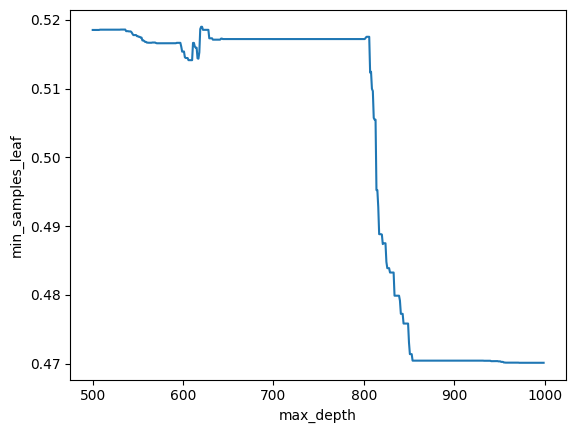

In [20]:
import matplotlib.pyplot as plt
plt.plot(min_samples_leaf_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')

In [104]:
sorted(zip(accuracy_scores, min_samples_leaf_range))[::-1][0]

(0.5189780149370622, 621)

In [21]:
clf = DecisionTreeRegressor(criterion='squared_error',max_depth=8,min_samples_leaf=621, random_state=1)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=10).mean()

predictions = clf.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 15667.79
R-squared: 0.52


Al hacer un arbol de regresión con estos datos, podemos ver que los resultados que se obtienen son bastante buenos pues el R cuadrado alcanza un valor de 0.52 por lo que el modelo se está ajustando de buena manera a los datos. El mse de 15667 es bueno para el tipo de modelo lo cual indica que las predicciones del modelo son más precisas

En este caso hay algunas mejorías comparado con la regresión lineal pues se pueden analizar e interpretar los datos más facilmente y se tiene menor sensibilidad a los outliers.  

Comparando con el arbol de decisión del punto 3, se obtienen mejores resultados al poder iterar más fácilmente con las bibliotecas y poder optimizar algunos parámetros como lo son el min_samples_leaf and max_depth.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [22]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [23]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [24]:
feature_cols = df.drop(['url', 'Popular'], axis=1)
y=df['Popular']
X = feature_cols

In [25]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
df['Popular'].describe()

count    6000.000000
mean        0.500000
std         0.500042
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: Popular, dtype: float64

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [27]:
# Celda 6
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
log = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = log.predict(X_test)
prdict = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, prdict)
f1 = f1_score(y_test, prdict, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.61
F1 Score: 0.61


In [28]:
max_depth_range = range(3, 21)
accuracy_scores = []
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf =  DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_test, y_test, cv=10).mean())

In [29]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6253333333333334, 3)

clf = DecisionTreeClassifier(criterion='squared_error',max_depth=6, random_state=1)
clf.fit(X_train, y_train)

In [30]:
clf =  DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(X, y)
predictions = clf.predict(X_test)
prdict = (predictions > 0.5).astype(int)

In [31]:
accuracy = accuracy_score(y_test, prdict)
f1 = f1_score(y_test, prdict, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.65
F1 Score: 0.65


En la regresión logistica podemos ver que el accuracy es de 0.61 y el F1 score es de 0.61 Para el árbol de decision las métricas son de 0.65, lo cual es un poco mejor. De esto vemos que ambos modelos están teniendo buen desempeño para identificar los casos verdaderos, sea positivos o negativos.

El F1 score es una medida que depronto es mejor en algunos casos porque puede ser una base desbalanceada y con una distribucion diferente por ser la poularidad de las noticias una cosa tan complicada para predecir, pero al mirar los falsos positivos y falsos negativos y los positivos verdaderos y negativos verdaderos, estamos viendo los mismos resultados por lo cual parece ser que la base está altamente balanceada. 

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [39]:
# Celda 7
n_samples = 300
samples = []
n_B = 300

for i in range(n_samples):
    # randomly sample the dataset with replacement
    sample = df.sample(n=len(df), replace=True)
    # add the sample to the list of bagging samples
    samples.append(sample)

In [40]:
# DataFrame para guardar las predicciones de cada árbol
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
accuracy =pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
f1=pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])


# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i, sample in enumerate(samples):
    feature_cols = sample.drop(['url', 'Popular'], axis=1)
    y=sample['Popular']
    X = feature_cols
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    treereg = DecisionTreeClassifier(max_depth=20, random_state=123)
    treereg.fit(X_train, y_train)
    y_pred.iloc[:,i] = treereg.predict(X_test)
    prdict = (predictions > 0.5).astype(int)
    accuracy.iloc[:,i] =accuracy_score(y_test, prdict)
    f1.iloc[:,i] = f1_score(y_test, prdict, average='weighted')


In [41]:
accuracy = accuracy.iloc[:, 0].mean()
f1 = f1.iloc[:, 0].mean()

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.51
F1 Score: 0.51


In [42]:
treereg = DecisionTreeClassifier(min_samples_leaf=50, random_state=123)

# DataFrame para guardar las predicciones de cada árbol
y_pred1 = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
accuracy1 =pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
f11=pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i, modelos in enumerate(samples):
    feature_cols = sample.drop(['url', 'Popular'], axis=1)
    y=sample['Popular']
    X = feature_cols
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    treereg = DecisionTreeClassifier(min_samples_leaf=50, random_state=123)
    treereg.fit(X_train, y_train)
    y_pred1.iloc[:,i] = treereg.predict(X_test)
    prdict = (predictions > 0.5).astype(int)
    accuracy1.iloc[:,i] =accuracy_score(y_test, prdict)
    f11.iloc[:,i] = f1_score(y_test, prdict, average='weighted')
    

In [43]:
accuracy = accuracy1.iloc[:, 0].mean()
f1 = f11.iloc[:, 0].mean()

print(f"Accuracy 1: {accuracy:.2f}")
print(f"F1 Score 1: {f1:.2f}")

Accuracy 1: 0.50
F1 Score 1: 0.49


In [44]:
# DataFrame para guardar las predicciones de cada árbol
y_pred2 = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
accuracy2 =pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])
f12=pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# Entrenamiento de un árbol sobre cada muestra boostrap y predicción sobre los datos de test
for i, sample in enumerate(samples):
    feature_cols = sample.drop(['url', 'Popular'], axis=1)
    y=sample['Popular']
    X = feature_cols
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    treereg = LogisticRegression(random_state=0).fit(X_train, y_train)
    treereg.fit(X_train, y_train)
    y_pred2.iloc[:,i] = treereg.predict(X_test)
    prdict = (predictions > 0.5).astype(int)
    accuracy2.iloc[:,i] =accuracy_score(y_test, prdict)
    f12.iloc[:,i] = f1_score(y_test, prdict, average='weighted')
    
    

In [45]:
accuracy = accuracy2.iloc[:, 0].mean()
f1 = f12.iloc[:, 0].mean()

print(f"Accuracy 2: {accuracy:.2f}")
print(f"F1 Score 2: {f1:.2f}")

Accuracy 2: 0.51
F1 Score 2: 0.51


In [46]:
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeClassifier(), n_estimators=300, 
                          bootstrap=True, oob_score=True, random_state=1)

In [47]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([0.53333333, 0.35333333, 0.15      , ..., 0.84666667, 0.58      ,
       0.42333333])

In [53]:
from sklearn import metrics
y_pred = (y_pred > 0.5).astype(int)
metrics.f1_score(y_pred, y_test)

0.8270777479892761

In [54]:
metrics.accuracy_score(y_pred, y_test)

0.828

Empezando por el primer árbol de clasificación donde la profundidad maáxima toma un valor de 20, encontramos un accuracy y un f1 score de 0.51. Para el modelo de arbol de decision con el min_samples_leaf igual a 50, el accuracy es de 0.50 y el f1 score es de 0.49. Para el modelo de regresión logistica obtenemos uns resultados muy similares al primer modelo, con un accuracy y f1 score de 0.51.


Para el modelo de ensamblaje se obtienen muchos mejores metricas son un accuracy de 0.828 y en F1 score de 0.827. Tiene un muhco mejor poder predictivo que cada uno de los árboles por separado, por lo cual es recomendado usar este tipo de ensambles ya que mejoran el poder predictivo 

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [55]:
clf = BaggingRegressor(DecisionTreeClassifier(), n_estimators=300, 
                          bootstrap=True, oob_score=True, random_state=1)

In [56]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.8270777479892761, 0.828)

In [57]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred= (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)
#y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [58]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.8280936454849498, 0.8286666666666667)

Viendo la votacion con ponderación por los errores, los rendimientos en términos de accuracy y F1 score son muy similares a la votacion ponderada, pero significativamente mejor que los modelos de manera independeinte. Los accuracy (0.829) y F1 (0.828) muestran que el modelo es bueno prediciendo las muestras correctamente pero en este contexto de popularidad de noticias, no hay una identificacion de casos más importante, por lo cual es bueno tomar en cuenta las dos metricas.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

En las diferentes opciones con bagging, ya sea con votación mayoritaria o votación ponderada con los errores, si se obtienen mejores resultados que en los modelos independientes. En este caso en el que la votación la ponderamos por la accuracy, vemos que los resultados son bastantes similares con un F1 score de 0.82 y un accuracy de 0.82. 

Cabe resaltar que la votacion mayoritaria suele ser mejor en terminos de interpretación y es bueno cuando los modelos base tienen un rendimiento similar. La votación ponderada es buena porque le da mayor importancia a los mejores modelos (que tienen menor error) y mejora el rendimiento cuando los modelos bases tienen rendimientos diferentes, unos mejores que otros. 

Es importante en cada caso definir cual es mejor, y dado que los modelos base tienen unas metricas similares y la comparación entre las dos metdologías es similar, ya es criterio del investigador cual metdología usar. En este caso, yo usaría la votación ponderada porque las metricas son un poco mejores y me parece valioso darle peso a los modelos con menores errores.
